In [5]:
# Setting: I was given a data set that I'd never seen before. Our research question is "what is the best method to easily predict the type of iris from the sepal/petal length and width data?" 

## initial data exploration 

In [6]:
# import data 
from sklearn.datasets import load_iris

iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris_data = iris['data']
print(iris_data[:20])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]]


In [9]:
iris.data.shape # 150 samples, 4 features for each sample 

# column titles are: sepal length, sepal width, petal length, petal width 
col_titles = ['sepal length', 'sepal width', 'petal length', 'petal width']


In [10]:
# is there any missing data? 
import numpy as np
np.any(np.isnan(iris_data))

False

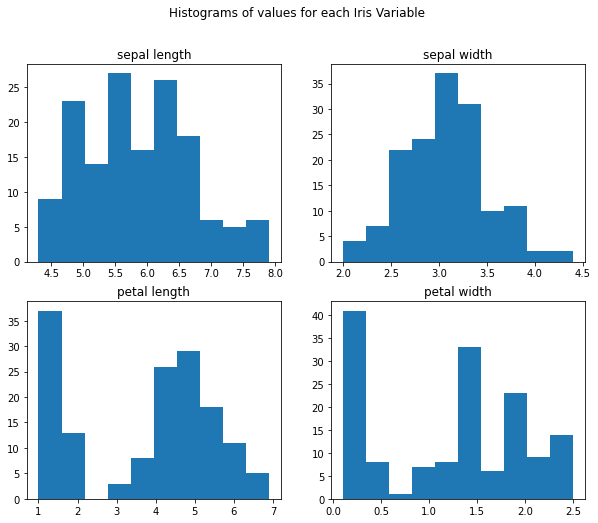

In [13]:
# what do the values look like for each attribute? 
import matplotlib.pyplot as plt 

# making subplots objects
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(10, 8))

fig.suptitle('Histograms of values for each Iris Variable')
for n in range(4):
    current_subplot = ax[n//2, n%2]
    current_subplot.hist(iris_data[:, n])
    current_subplot.title.set_text(col_titles[n])
    # current_subplot.set_xaxis("(cm)")

# save plot  
plt.savefig('histogram_of_features.png')

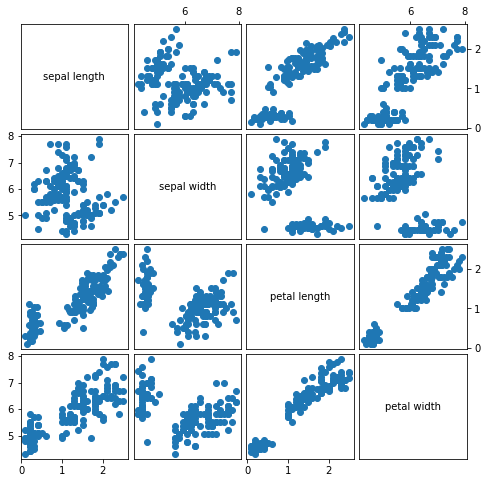

In [14]:
#modified from https://stackoverflow.com/questions/7941207/is-there-a-function-to-make-scatterplot-matrices-in-matplotlib
import itertools

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for ax in axes.flat:
    # Hide all ticks and labels
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Set up ticks only on one side for the "edge" subplots...
    if ax.is_first_col():
        ax.yaxis.set_ticks_position('left')
    if ax.is_last_col():
        ax.yaxis.set_ticks_position('right')
    if ax.is_first_row():
        ax.xaxis.set_ticks_position('top')
    if ax.is_last_row():
        ax.xaxis.set_ticks_position('bottom')


# Plot the data.
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    for x, y in [(i,j), (j,i)]:
        axes[x,y].scatter(iris.data[:, x], iris.data[:, y])


# Label the diagonal subplots...
for i, label in enumerate(col_titles):
    axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
            ha='center', va='center')


# Turn on the proper x or y axes ticks.
for i, j in zip(range(4), itertools.cycle((-1, 0))):
    axes[j,i].xaxis.set_visible(True)
    axes[i,j].yaxis.set_visible(True)

plt.savefig('pairwise_scatter_plot.png')

<Figure size 432x288 with 0 Axes>

##  sub-types of iris

In [78]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

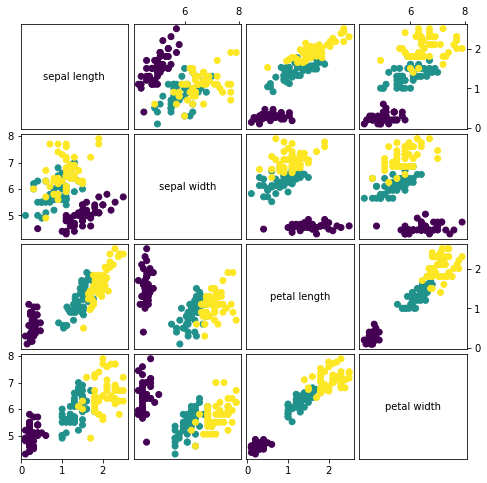

In [80]:
# scatter plot colored by subtypes 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for ax in axes.flat:
    # Hide all ticks and labels
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Set up ticks only on one side for the "edge" subplots...
    if ax.is_first_col():
        ax.yaxis.set_ticks_position('left')
    if ax.is_last_col():
        ax.yaxis.set_ticks_position('right')
    if ax.is_first_row():
        ax.xaxis.set_ticks_position('top')
    if ax.is_last_row():
        ax.xaxis.set_ticks_position('bottom')


# Plot the data.
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    for x, y in [(i,j), (j,i)]:
        axes[x,y].scatter(iris_data[:, x], iris_data[:, y], c=iris.target)


# Label the diagonal subplots...
for i, label in enumerate(col_titles):
    axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
            ha='center', va='center')


# Turn on the proper x or y axes ticks.
for i, j in zip(range(4), itertools.cycle((-1, 0))):
    axes[j,i].xaxis.set_visible(True)
    axes[i,j].yaxis.set_visible(True)

plt.savefig('pairwise_scatter_plot_by_type.png')

### what is the best method to predict the type of iris based on the data? 

In [41]:
 ## Run PCA on the data set 
from sklearn.decomposition import PCA

pca = PCA()
trained_pca = pca.fit(iris.data)
fitted_data = pca.transform(iris.data)

In [123]:
fitted_data.shape

(50, 4)

In [47]:
per_var = np.round(trained_pca.explained_variance_ratio_* 100, decimals=1)

array([92.5,  5.3,  1.7,  0.5])

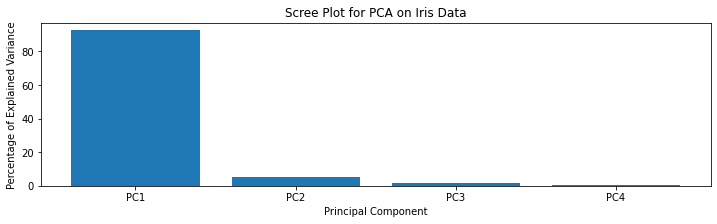

In [50]:
# scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure(figsize=(12, 3))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for PCA on Iris Data')
plt.show()

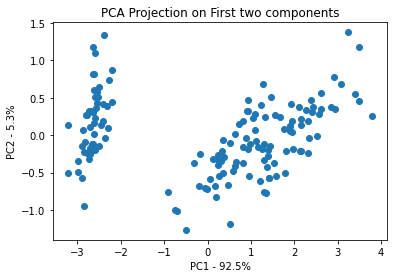

In [56]:
#the following code makes a fancy looking plot using PC1 and PC2

import pandas as pd 

per_var = np.round(trained_pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(fitted_data, index=[*list(range(150))], columns=labels) 

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Projection on First two components')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
 
plt.show()
 

In [57]:
# 1 eigenvector explains 92% of variance in data
# which variables contributed most to that eigenvector? 

In [59]:
trained_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [68]:
for i in range(len(col_titles)):
    print("Contribution of {} to PC1: {}".format(col_titles[i], np.around(trained_pca.components_[0][i], 2)))


Contribution of sepal length to PC1: 0.36
Contribution of sepal width to PC1: -0.08
Contribution of petal length to PC1: 0.86
Contribution of petal width to PC1: 0.36


In [ ]:
# seems like petal length can be used to distinguish the three types of irises pretty well 


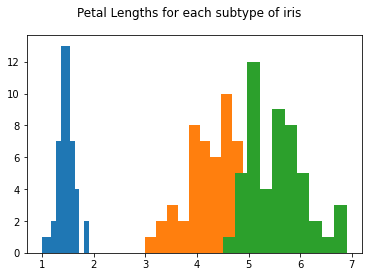

In [94]:
fig = plt.figure()
fig.suptitle('Petal Lengths for each subtype of iris')
plt.hist(iris_setosa[:, 2])
plt.hist(iris_versicolor[:, 2])
plt.hist(iris_virginica[:, 2])
plt.show()

In [96]:
from sklearn.cluster import KMeans


In [102]:
clusterer = KMeans(n_clusters=3)
labels = clusterer.fit_predict(iris_data)

In [103]:
from sklearn.metrics import adjusted_rand_score

In [105]:
adjusted_rand_score(iris.target, labels)

0.7302382722834697

In [106]:
clusterer2 = KMeans(n_clusters=3)
reshaped_petal_lengths = np.expand_dims(iris_data[:, 2], -1)
labels = clusterer.fit_predict(reshaped_petal_lengths)

adjusted_rand_score(iris.target, labels)

0.8509627406851713

In [ ]:
# conclusion: the petal lengths are pretty good for predicting type. better than the full data set 

In [124]:
clusterer2 = KMeans(n_clusters=3)
reshaped_PCA = np.expand_dims(fitted_data[:, 0], -1)
labels = clusterer.fit_predict(reshaped_PCA)

In [125]:
adjusted_rand_score(iris.target, labels)

ValueError: Found input variables with inconsistent numbers of samples: [150, 50]

In [ ]:
# now I want to redo this analysis on a subset of the data (this is a somewhat contrived example so I'm going to choose a random subset of the data, but in a real analysis there are plenty of reasons you may want to do the same analysis but on a slightly modified version of the dataset or on new data from the same experiment)

# let's see if the metrics we devised for the entire dataset work as well on a subset of the data 

In [112]:
n_samples = iris_data.shape[0]
subset_indices = np.random.choice(range(n_samples), 50) #get 50 samples 
subsetted_iris_data = iris_data[subset_indices]
subsetted_iris_data.shape

(50, 4)

In [113]:
clusterer = KMeans(n_clusters=3)
labels = clusterer.fit_predict(subsetted_iris_data)
adjusted_rand_score(iris.target[subset_indices], labels) # why is this so bad? 

0.858241572383589

In [114]:
clusterer2 = KMeans(n_clusters=3)
reshaped_petal_lengths = np.expand_dims(iris_data[:, 2], -1)
labels = clusterer.fit_predict(reshaped_petal_lengths)

adjusted_rand_score(iris.target, labels)

0.8680377279943841

In [120]:
 ## Run PCA on the data set 
from sklearn.decomposition import PCA

pca = PCA()
trained_pca = pca.fit(subsetted_iris_data.data)
fitted_data = pca.transform(subsetted_iris_data.data)

clusterer2 = KMeans(n_clusters=3)
reshaped_PCA = np.expand_dims(fitted_data[:, 0], -1)
labels = clusterer.fit_predict(reshaped_PCA)
adjusted_rand_score(iris.target[subset_indices], labels)

0.7986334173008659